# Luxury watch Dataset

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv(r"E:\PYTHON\python Datasets\Luxury watch.csv")
data.sample(5)

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
100,Audemars Piguet,Royal Oak,Stainless Steel,Stainless Steel,Automatic,50 meters,41.0,10.40,20.0,Silver,Sapphire,Date,60 hours,"21,000"
152,Vacheron Constantin,Overseas,Stainless Steel,Rubber,Automatic,150 meters,41.5,11.00,22.0,Blue,Sapphire,Date,40 hours,"18,900"
32,Blancpain,Fifty Fathoms,Stainless Steel,Canvas,Automatic,300 meters,45.0,15.40,23.0,Black,Sapphire,Date,120 hours,"11,500"
383,Zenith,El Primero,Stainless Steel,Leather,Automatic,100 meters,42.0,12.75,20.0,White,Sapphire,"Date, Chronograph, Moon Phase",50 hours,"7,500"
255,Longines,Master Collection,Stainless Steel,Leather,Automatic,30 meters,40.0,9.35,20.0,Silver,Sapphire,Date,64 hours,"1,500"


#### object
object of this ml project is predict the price of the watch also this data not good for ml i am trying to do get better accuracy

#### About Dataset

This dataset contains information about luxury watch models from various brands, including their prices, case and strap materials, movement types, water resistance levels, and additional details such as case diameter, case thickness, band width, dial color, crystal material, complications, and power reserve. The data is useful for individuals interested in luxury watches, including watch collectors, enthusiasts, and retailers.

#### EDA

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                507 non-null    object 
 1   Model                507 non-null    object 
 2   Case Material        507 non-null    object 
 3   Strap Material       507 non-null    object 
 4   Movement Type        507 non-null    object 
 5   Water Resistance     507 non-null    object 
 6   Case Diameter (mm)   507 non-null    float64
 7   Case Thickness (mm)  507 non-null    float64
 8   Band Width (mm)      507 non-null    float64
 9   Dial Color           507 non-null    object 
 10  Crystal Material     507 non-null    object 
 11  Complications        507 non-null    object 
 12  Power Reserve        493 non-null    object 
 13  Price (USD)          506 non-null    object 
dtypes: float64(3), object(11)
memory usage: 55.6+ KB


In [3]:
data.isnull().sum()

Brand                   0
Model                   0
Case Material           0
Strap Material          0
Movement Type           0
Water Resistance        0
Case Diameter (mm)      0
Case Thickness (mm)     0
Band Width (mm)         0
Dial Color              0
Crystal Material        0
Complications           0
Power Reserve          14
Price (USD)             1
dtype: int64

In [4]:
data.dropna(inplace=True)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Case Diameter (mm),492.0,41.181911,2.202308,33.00,40.0,41.000,42.00,46.50
Case Thickness (mm),492.0,11.670610,2.424666,5.15,9.8,12.235,13.32,16.95
Band Width (mm),492.0,21.153455,1.596626,16.00,20.0,20.000,22.00,28.00


In [6]:
data.describe(include='O').T

,count,unique,top,freq
Brand,492,37,IWC,39
Model,492,89,Royal Oak,38
Case Material,492,16,Stainless Steel,392
Strap Material,492,14,Leather,216
Movement Type,492,3,Automatic,441
Water Resistance,492,12,100 meters,129
Dial Color,492,7,Black,213
Crystal Material,492,4,Sapphire,475
Complications,492,30,Date,232
Power Reserve,492,24,60 hours,82


In [55]:
from pandas_profiling import ProfileReport
Report=ProfileReport(data)
Report.to_file(output_file='watch_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
data.rename(columns={'Price (USD)':'price'},inplace=True)

In [9]:
data.columns

Index(['Brand', 'Model', 'Case Material', 'Strap Material', 'Movement Type',
       'Water Resistance', 'Case Diameter (mm)', 'Case Thickness (mm)',
       'Band Width (mm)', 'Dial Color', 'Crystal Material', 'Complications',
       'Power Reserve', 'price'],
      dtype='object')

In [10]:
data['price'] = data['price'].str.replace(',', '').astype(float)

In [11]:
data.price.head()

0    9500.0
1    5800.0
2    4200.0
3    7900.0
5    5500.0
Name: price, dtype: float64

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

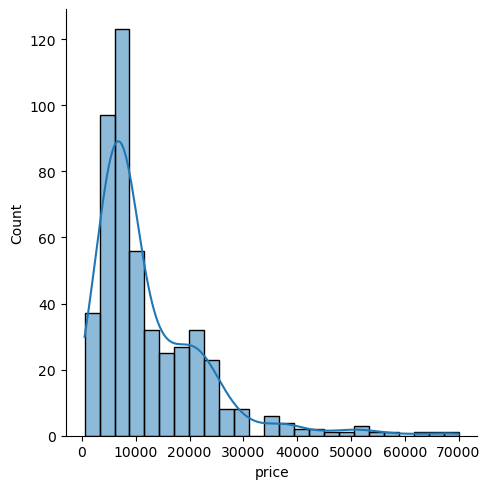

In [13]:
sns.displot(data.price,kde=True)
plt.show()

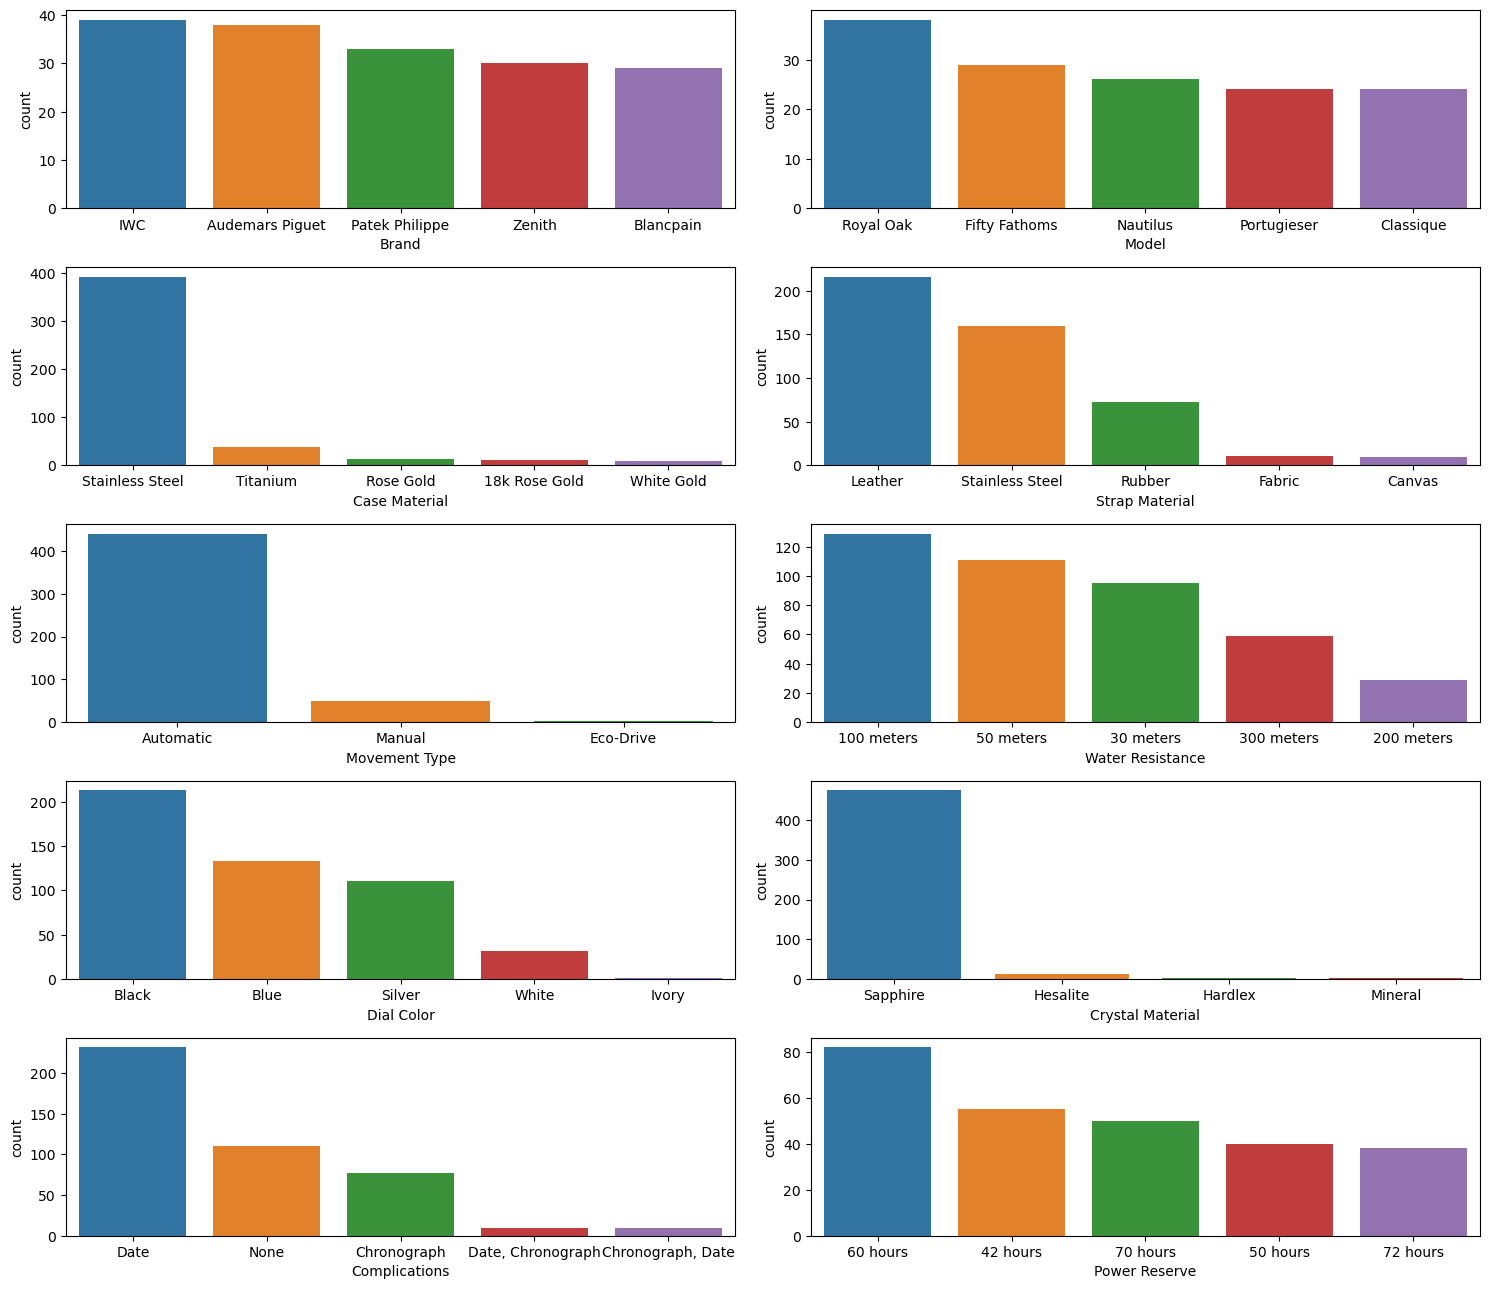

In [14]:
col= data.select_dtypes(include=['object']).columns
plt.subplots(figsize=(15,13))
for num,i in enumerate(col,1):
    plt.subplot(5,2,num)
    sns.countplot(x=data[i],data=data,order=data[i].value_counts().head().index)
plt.tight_layout()
plt.show()

In [15]:
data['Case Diameter (mm)'].dtype

dtype('float64')

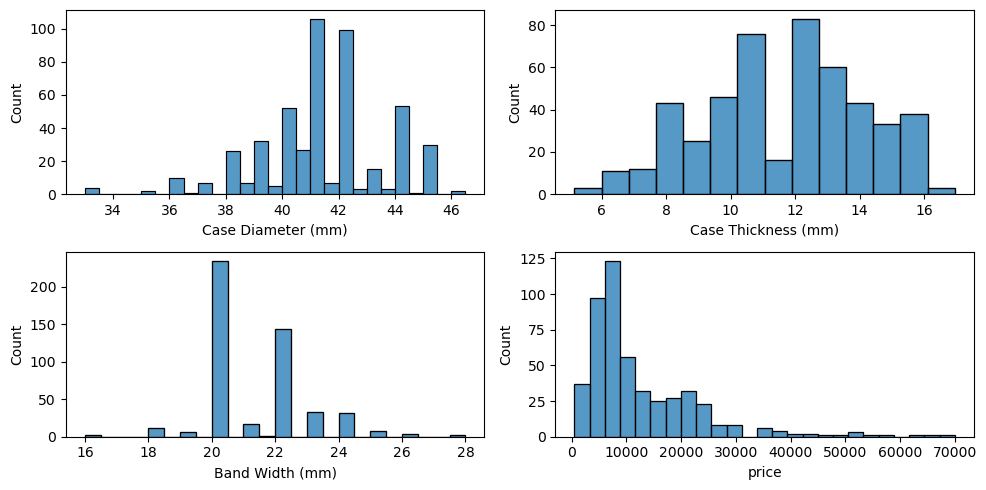

In [17]:
col = data.select_dtypes(include=['float']).columns
plt.figure(figsize=(10, 5))

for num,i in enumerate(col,1):
    plt.subplot(2,2,num)
    sns.histplot(data[i])
    
plt.tight_layout()
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols = data.select_dtypes(include=['object']).columns

for col in cols:
    data[col] = le.fit_transform(data[col])

In [19]:
data.dtypes

Brand                    int32
Model                    int32
Case Material            int32
Strap Material           int32
Movement Type            int32
Water Resistance         int32
Case Diameter (mm)     float64
Case Thickness (mm)    float64
Band Width (mm)        float64
Dial Color               int32
Crystal Material         int32
Complications            int32
Power Reserve            int32
price                  float64
dtype: object

In [20]:
x=data.iloc[:,:-1]
y=data.price
display(x.head(),y.head())

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve
0,27,81,12,11,0,7,40.0,13.00,20.0,0,3,4,12
1,22,76,13,9,0,11,43.5,14.47,21.0,1,3,4,17
2,31,16,12,5,0,0,41.0,13.00,20.0,6,3,0,7
3,7,57,12,11,0,6,43.0,14.25,22.0,0,3,0,21
5,18,71,12,5,2,6,42.9,9.20,20.0,0,3,27,10


0    9500.0
1    5800.0
2    4200.0
3    7900.0
5    5500.0
Name: price, dtype: float64

In [21]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

# df is your original dataframe
df = data

# Create an empty dataframe to store the results
result_df = pd.DataFrame(columns=['column_name', 'score'])

# Loop over all columns in the dataframe
for col_name in df.columns:
    # Select the current column as the feature matrix and target variable
    X = df[[col_name]]
    y = df['price']

    # Apply univariate feature selection to the current column
    selector = SelectKBest(score_func=f_regression, k=1)
    selector.fit(X, y)

    # Get the score of the selected feature
    score = selector.scores_[0]

    # Store the column name and score in the result dataframe
    new_data = {'column_name': [col_name], 'score': [score]}
    new_df = pd.DataFrame(data=new_data)
    result_df = pd.concat([result_df, new_df], ignore_index=True)

# Sort the result dataframe by score
result_df = result_df.sort_values(by='score', ascending=False)

In [22]:
result_df

,column_name,score
13,price,2.206764e+18
7,Case Thickness (mm),1.255523e+02
3,Strap Material,3.376279e+01
2,Case Material,1.844852e+01
10,Crystal Material,1.086285e+01
6,Case Diameter (mm),9.555917e+00
0,Brand,8.440520e+00
8,Band Width (mm),6.562561e+00
1,Model,3.748917e+00
5,Water Resistance,1.186382e+00


In [23]:
x.drop(columns=['Case Diameter (mm)','Brand','Band Width (mm)','Model','Water Resistance','Dial Color',
               'Movement Type','Case Material','Crystal Material'],inplace=True)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=15)

In [25]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold
#boosting
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor

models = [
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor(),
    AdaBoostRegressor()
]

results = []
names = []
kfold = KFold(n_splits=10, shuffle=True, random_state=15)

for model in models:
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(type(model).__name__)
    print(f'{type(model).__name__} - R^2: {np.mean(cv_results):.3f} ({np.std(cv_results):.3f})')

RandomForestRegressor - R^2: 0.693 (0.102)
GradientBoostingRegressor - R^2: 0.725 (0.075)
XGBRegressor - R^2: 0.661 (0.111)
AdaBoostRegressor - R^2: 0.468 (0.176)


**Based on this we can use GradientBoostingRegressor**

In [26]:
model=GradientBoostingRegressor().fit(x_train,y_train)

In [27]:
from sklearn.model_selection import RandomizedSearchCV
model = GradientBoostingRegressor()

param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': np.logspace(-3, 0, 4),
    'max_depth': [1, 3, 5]
}

random_search = RandomizedSearchCV(model,
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   cv=5)

# X and y are your training data and labels
random_search.fit(X, y)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': array([0.001, 0.01 , 0.1  , 1.   ]),
                                        'max_depth': [1, 3, 5],
                                        'n_estimators': [100, 200, 300]})

In [28]:
random_search.best_params_

{'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}

In [32]:
model=GradientBoostingRegressor(n_estimators= 200, max_depth= 5, learning_rate= .1).fit(x_train,y_train)

In [33]:
y_pred=model.predict(x_test)

In [34]:
from sklearn import metrics
print(f"Mean Abslote Error : {metrics.mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error : {metrics.mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error : {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")
print(f"R^2 : {metrics.r2_score(y_test,y_pred)}")

Mean Abslote Error : 2468.390195011507
Mean Squared Error : 21102045.179567546
Root Mean Squared Error : 4593.696243720034
R^2 : 0.7910690320357417


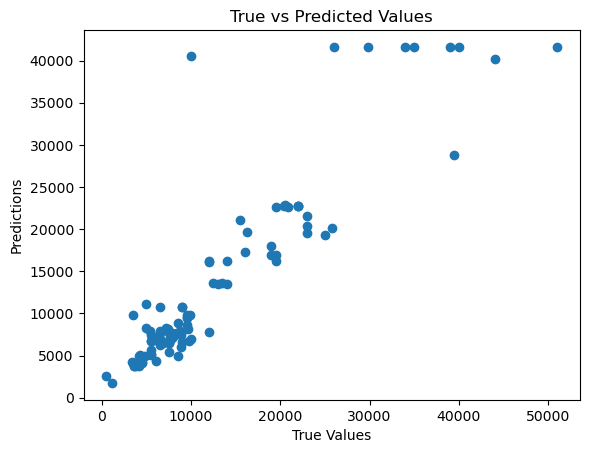

In [36]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

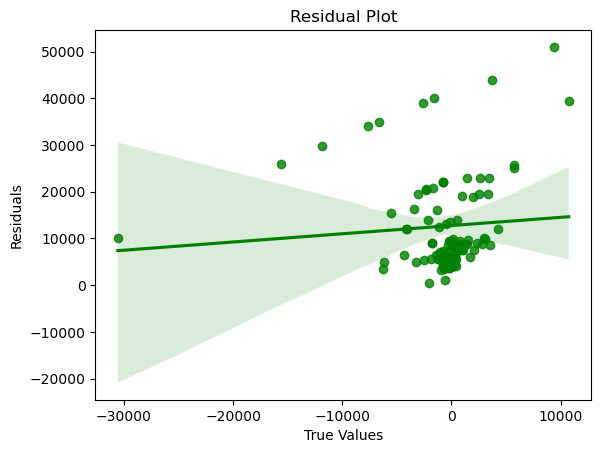

In [44]:
residuals = y_test - y_pred
sns.regplot(residuals,y_test,color='green')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()